## Word Embeddings
...
word2vec model, t-SNE scatterplot

In [1]:
#import libraries 
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [2]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#set configuration/OHCO params
OHCO = ['text_id', 'para_num', 'sent_num', 'token_num', 'author', 'title']
BAG = OHCO[:2] # Paragraphs
# BAG = OHCO[:4] # Sentences
window = 5

In [4]:
#Import TOKENS 
TOKENS = pd.read_csv("TOKEN_expanded.csv").set_index(OHCO)
TOKENS.head()

pos_tuple  \
text_id para_num sent_num token_num author    title                                   
1       16       0        0         Aristotle NicomachaenEthics     ('Every', 'DT')   
                          1         Aristotle NicomachaenEthics       ('art', 'NN')   
                          2         Aristotle NicomachaenEthics       ('and', 'CC')   
                          3         Aristotle NicomachaenEthics     ('every', 'DT')   
                          4         Aristotle NicomachaenEthics  ('inquiry,', 'NN')   

                                                                pos token_str  \
text_id para_num sent_num token_num author    title                             
1       16       0        0         Aristotle NicomachaenEthics  DT     Every   
                          1         Aristotle NicomachaenEthics  NN       art   
                          2         Aristotle NicomachaenEthics  CC       and   
                          3         Aristotle NicomachaenEthics  DT     every   
                          4         Aristotle NicomachaenEthics  NN  inquiry,   

                                                                term_str  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    every   
                          1         Aristotle NicomachaenEthics      art   
                          2         Aristotle NicomachaenEthics      and   
                          3         Aristotle NicomachaenEthics    every   
                          4         Aristotle NicomachaenEthics  inquiry   

                                                                 term_id  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    15890   
                          1         Aristotle NicomachaenEthics     2942   
                          2         Aristotle NicomachaenEthics     1976   
                          3         Aristotle NicomachaenEthics    15890   
                          4         Aristotle NicomachaenEthics    23364   

                                                                                                          file  \
text_id para_num sent_num token_num author    title                                                              
1       16       0        0         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          1         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          2         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          3         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          4         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   

                                                                gender  \
text_id para_num sent_num token_num author    title                      
1       16       0        0         Aristotle NicomachaenEthics      M   
                          1         Aristotle NicomachaenEthics      M   
                          2         Aristotle NicomachaenEthics      M   
                          3         Aristotle NicomachaenEthics      M   
                          4         Aristotle NicomachaenEthics      M   

                                                                     era  
text_id para_num sent_num token_num author    title                       
1       16       0        0         Aristotle NicomachaenEthics  ancient  
                          1         Aristotle NicomachaenEthics  ancient  
                          2         Aristotle NicomachaenEthics  ancient  
                          3         Aristotle NicomachaenEthics  ancient  
                          4         Aristotle NicomachaenEthic

In [5]:
#create table of female authors
female = TOKENS[TOKENS.gender == 'F']
female.head()

pos_tuple  \
text_id para_num sent_num token_num author       title                                             
7       501      0        0         HannahArendt TheOriginsofTotalitarianism      ('Many', 'JJ')   
                          1         HannahArendt TheOriginsofTotalitarianism     ('still', 'RB')   
                          2         HannahArendt TheOriginsofTotalitarianism  ('consider', 'VB')   
                          3         HannahArendt TheOriginsofTotalitarianism       ('it', 'PRP')   
                          4         HannahArendt TheOriginsofTotalitarianism        ('an', 'DT')   

                                                                              pos  \
text_id para_num sent_num token_num author       title                              
7       501      0        0         HannahArendt TheOriginsofTotalitarianism   JJ   
                          1         HannahArendt TheOriginsofTotalitarianism   RB   
                          2         HannahArendt TheOriginsofTotalitarianism   VB   
                          3         HannahArendt TheOriginsofTotalitarianism  PRP   
                          4         HannahArendt TheOriginsofTotalitarianism   DT   

                                                                             token_str  \
text_id para_num sent_num token_num author       title                                   
7       501      0        0         HannahArendt TheOriginsofTotalitarianism      Many   
                          1         HannahArendt TheOriginsofTotalitarianism     still   
                          2         HannahArendt TheOriginsofTotalitarianism  consider   
                          3         HannahArendt TheOriginsofTotalitarianism        it   
                          4         HannahArendt TheOriginsofTotalitarianism        an   

                                                                              term_str  \
text_id para_num sent_num token_num author       title                                   
7       501      0        0         HannahArendt TheOriginsofTotalitarianism      many   
                          1         HannahArendt TheOriginsofTotalitarianism     still   
                          2         HannahArendt TheOriginsofTotalitarianism  consider   
                          3         HannahArendt TheOriginsofTotalitarianism        it   
                          4         HannahArendt TheOriginsofTotalitarianism        an   

                                                                              term_id  \
text_id para_num sent_num token_num author       title                                  
7       501      0        0         HannahArendt TheOriginsofTotalitarianism    27510   
                          1         HannahArendt TheOriginsofTotalitarianism    42920   
                          2         HannahArendt TheOriginsofTotalitarianism     8932   
                          3         HannahArendt TheOriginsofTotalitarianism    24364   
                          4         HannahArendt TheOriginsofTotalitarianism     1890   

                                                                                                                           file  \
text_id para_num sent_num token_num author       title                                                                            
7       501      0        0         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          1         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          2         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          3         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          4         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTot

In [6]:
#create table of male authors
male = TOKENS[TOKENS.gender == 'M']
male.head()

pos_tuple  \
text_id para_num sent_num token_num author    title                                   
1       16       0        0         Aristotle NicomachaenEthics     ('Every', 'DT')   
                          1         Aristotle NicomachaenEthics       ('art', 'NN')   
                          2         Aristotle NicomachaenEthics       ('and', 'CC')   
                          3         Aristotle NicomachaenEthics     ('every', 'DT')   
                          4         Aristotle NicomachaenEthics  ('inquiry,', 'NN')   

                                                                pos token_str  \
text_id para_num sent_num token_num author    title                             
1       16       0        0         Aristotle NicomachaenEthics  DT     Every   
                          1         Aristotle NicomachaenEthics  NN       art   
                          2         Aristotle NicomachaenEthics  CC       and   
                          3         Aristotle NicomachaenEthics  DT     every   
                          4         Aristotle NicomachaenEthics  NN  inquiry,   

                                                                term_str  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    every   
                          1         Aristotle NicomachaenEthics      art   
                          2         Aristotle NicomachaenEthics      and   
                          3         Aristotle NicomachaenEthics    every   
                          4         Aristotle NicomachaenEthics  inquiry   

                                                                 term_id  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    15890   
                          1         Aristotle NicomachaenEthics     2942   
                          2         Aristotle NicomachaenEthics     1976   
                          3         Aristotle NicomachaenEthics    15890   
                          4         Aristotle NicomachaenEthics    23364   

                                                                                                          file  \
text_id para_num sent_num token_num author    title                                                              
1       16       0        0         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          1         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          2         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          3         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          4         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   

                                                                gender  \
text_id para_num sent_num token_num author    title                      
1       16       0        0         Aristotle NicomachaenEthics      M   
                          1         Aristotle NicomachaenEthics      M   
                          2         Aristotle NicomachaenEthics      M   
                          3         Aristotle NicomachaenEthics      M   
                          4         Aristotle NicomachaenEthics      M   

                                                                     era  
text_id para_num sent_num token_num author    title                       
1       16       0        0         Aristotle NicomachaenEthics  ancient  
                          1         Aristotle NicomachaenEthics  ancient  
                          2         Aristotle NicomachaenEthics  ancient  
                          3         Aristotle NicomachaenEthics  ancient  
                          4         Aristotle NicomachaenEthic

In [39]:
#create table for era = ancient
ancient = TOKENS[TOKENS.era == 'ancient']
ancient.head()

pos_tuple  \
text_id para_num sent_num token_num author    title                                   
1       16       0        0         Aristotle NicomachaenEthics     ('Every', 'DT')   
                          1         Aristotle NicomachaenEthics       ('art', 'NN')   
                          2         Aristotle NicomachaenEthics       ('and', 'CC')   
                          3         Aristotle NicomachaenEthics     ('every', 'DT')   
                          4         Aristotle NicomachaenEthics  ('inquiry,', 'NN')   

                                                                pos token_str  \
text_id para_num sent_num token_num author    title                             
1       16       0        0         Aristotle NicomachaenEthics  DT     Every   
                          1         Aristotle NicomachaenEthics  NN       art   
                          2         Aristotle NicomachaenEthics  CC       and   
                          3         Aristotle NicomachaenEthics  DT     every   
                          4         Aristotle NicomachaenEthics  NN  inquiry,   

                                                                term_str  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    every   
                          1         Aristotle NicomachaenEthics      art   
                          2         Aristotle NicomachaenEthics      and   
                          3         Aristotle NicomachaenEthics    every   
                          4         Aristotle NicomachaenEthics  inquiry   

                                                                 term_id  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    15890   
                          1         Aristotle NicomachaenEthics     2942   
                          2         Aristotle NicomachaenEthics     1976   
                          3         Aristotle NicomachaenEthics    15890   
                          4         Aristotle NicomachaenEthics    23364   

                                                                                                          file  \
text_id para_num sent_num token_num author    title                                                              
1       16       0        0         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          1         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          2         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          3         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          4         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   

                                                                gender  \
text_id para_num sent_num token_num author    title                      
1       16       0        0         Aristotle NicomachaenEthics      M   
                          1         Aristotle NicomachaenEthics      M   
                          2         Aristotle NicomachaenEthics      M   
                          3         Aristotle NicomachaenEthics      M   
                          4         Aristotle NicomachaenEthics      M   

                                                                     era  
text_id para_num sent_num token_num author    title                       
1       16       0        0         Aristotle NicomachaenEthics  ancient  
                          1         Aristotle NicomachaenEthics  ancient  
                          2         Aristotle NicomachaenEthics  ancient  
                          3         Aristotle NicomachaenEthics  ancient  
                          4         Aristotle NicomachaenEthic

In [7]:
#create corpus for all texts
corpus = TOKENS[~TOKENS.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
corpus[0]

['every',
 'art',
 'and',
 'every',
 'inquiry',
 'and',
 'similarly',
 'every',
 'action',
 'and',
 'pursuit']

In [8]:
#create corpus for female authors
female_corpus = female[~female.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
female_corpus[0]

['growing',
 'up',
 'i',
 'knew',
 'that',
 'i',
 'wanted',
 'to',
 'be',
 'a',
 'writer',
 'from']

In [9]:
#create corpus for male authors
male_corpus = male[~male.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
male_corpus[0]

['every',
 'art',
 'and',
 'every',
 'inquiry',
 'and',
 'similarly',
 'every',
 'action',
 'and',
 'pursuit']

### word2vec
- simple two-layer neural netword to produce word embeddings
- words and contexts
- represented using one-hot encoding

##### word2vec for ALL texts

In [10]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_all_texts = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_texts = pd.DataFrame(index=range(len(model_all_texts.wv.index_to_key)))
coords_texts['label'] = [w for w in model_all_texts.wv.index_to_key]
coords_texts['vector'] = coords_texts['label'].apply(lambda x: model_all_texts.wv.get_vector(x))
coords_texts.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_texts = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_texts = tsne_model_texts.fit_transform(coords_texts['vector'].tolist())

#add x and y coordinate columns - all texts
coords_texts['x'] = tsne_values_texts[:,0]
coords_texts['y'] = tsne_values_texts[:,1]

coords_texts.head()

label                                             vector         x         y
0   the  [0.31232697, 0.15378916, 0.019259095, 0.218727...  1.063461 -2.687808
1    of  [0.66278684, -0.14233412, 0.6556308, -0.048107...  1.335647  2.580075
2   and  [0.17552212, 0.5590557, -0.060877662, -0.24184...  7.739362 -1.627806
3    to  [-0.94397765, 1.0934227, 0.059173975, 0.041455...  7.321080 -6.940463
4    in  [-0.2984638, 0.9151774, -0.5634313, -1.0723071...  8.018914  2.873477

_______________________________________________________________________________________________

##### word2vec for FEMALE author texts

In [11]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_female = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_female = pd.DataFrame(index=range(len(model_female.wv.index_to_key)))
coords_female['label'] = [w for w in model_female.wv.index_to_key]
coords_female['vector'] = coords_female['label'].apply(lambda x: model_female.wv.get_vector(x))
coords_female.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_female = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_female = tsne_model_female.fit_transform(coords_female['vector'].tolist())

#add x and y coordinate columns - all texts
coords_female['x'] = tsne_values_female[:,0]
coords_female['y'] = tsne_values_female[:,1]

coords_female.head()

label                                             vector          x  \
0   the  [-0.078895874, 0.18376456, -0.23269549, 0.2366...  10.258557   
1    of  [0.14948705, -0.35689598, 0.17408009, 0.126046...   7.229132   
2   and  [0.23962021, 0.35240757, 0.091730714, 0.022360...   3.013592   
3    to  [-1.4462533, 1.197624, 0.43221363, 0.018203702...  16.847591   
4    in  [0.023144545, 0.73645425, -0.73328817, -1.0276...  -0.033543   

          y  
0  2.095089  
1  2.072527  
2 -2.394945  
3 -9.612734  
4 -4.295249

____________________________________________________________________________________________________________________________________________

##### word2vec for MALE author texts

In [12]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_male = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_male = pd.DataFrame(index=range(len(model_male.wv.index_to_key)))
coords_male['label'] = [w for w in model_male.wv.index_to_key]
coords_male['vector'] = coords_male['label'].apply(lambda x: model_male.wv.get_vector(x))
coords_male.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_male = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_male = tsne_model_male.fit_transform(coords_male['vector'].tolist())

#add x and y coordinate columns - all texts
coords_male['x'] = tsne_values_male[:,0]
coords_male['y'] = tsne_values_male[:,1]

coords_male.head()

label                                             vector          x  \
0   the  [0.27226678, -0.025114143, -0.45543954, 0.2704...  15.012722   
1    of  [0.4547018, -0.43235207, 0.16421883, -0.018451...  16.490688   
2   and  [0.13525684, 0.48539895, 0.24733177, -0.082080...  15.833444   
3    to  [-1.3423702, 0.5914826, 0.011679118, 0.2149389...   8.083958   
4    in  [-0.31254557, 0.2789913, -0.6900436, -0.626272...  16.684778   

          y  
0 -2.569317  
1 -3.633620  
2 -5.110635  
3 -5.002697  
4  8.134871

### t-SNE Plot for All Texts
.....

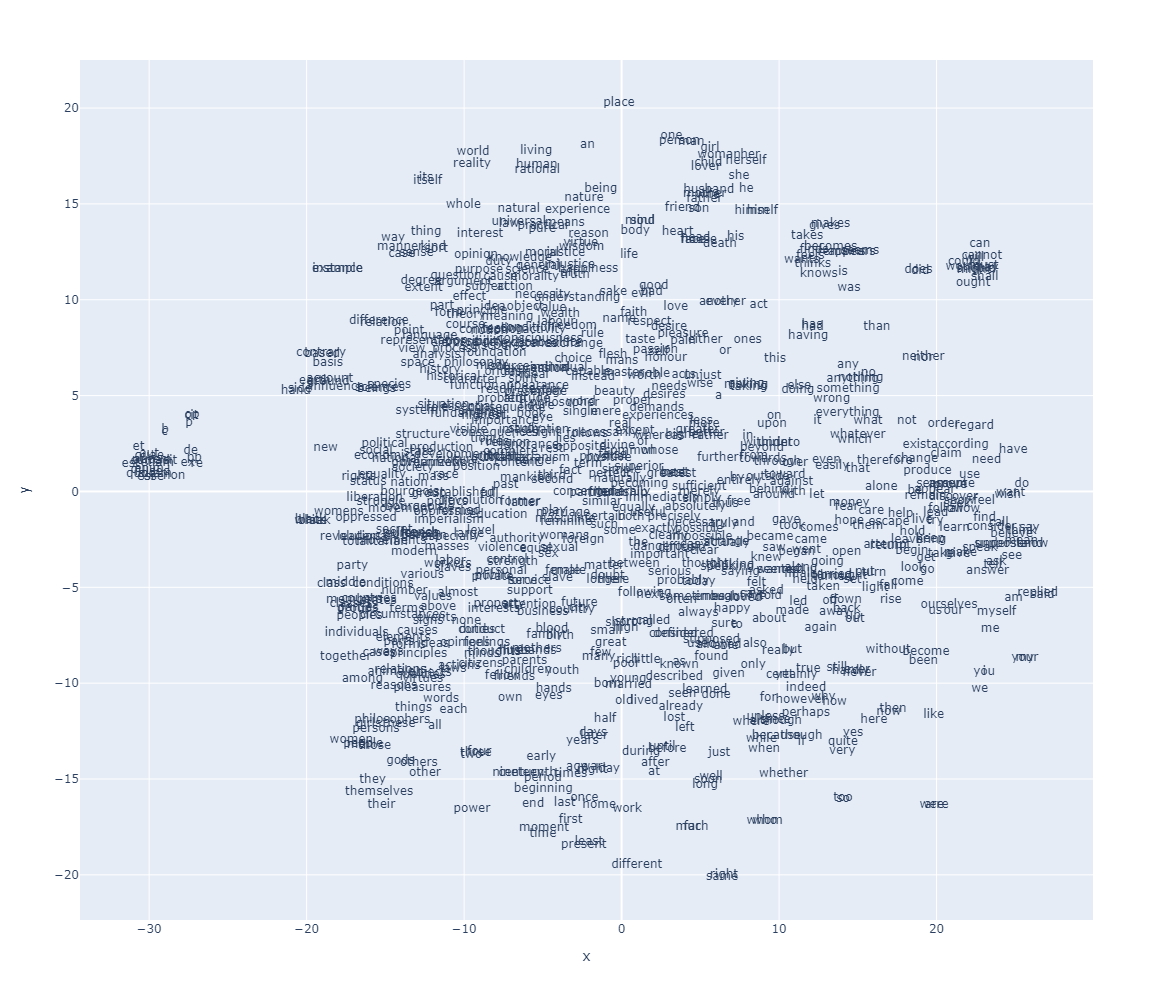

In [13]:
#Plot coordinates 
px.scatter(coords_texts, 'x', 'y', text='label', height=1000).update_traces(mode='text')

#### Analysis
...

### Semantic Algebra
....

#### All Texts

In [14]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# All Texts
def complete_analogy(A, B, C, n=2):
    try:
        return model_all_texts.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [15]:
complete_analogy('importance', 'consequences', 'problem')

[('foundation', 0.6269399523735046), ('mode', 0.6192483901977539)]

In [16]:
complete_analogy('discover', 'accept', 'lead')

[('make', 0.6931449174880981), ('remain', 0.6517409086227417)]

In [17]:
complete_analogy('economic', 'government', 'lead')

[('follow', 0.7042014002799988), ('try', 0.6475676894187927)]

In [18]:
complete_analogy('death', 'virtue', 'meaning')

[('principle', 0.7521421313285828), ('duty', 0.7062908411026001)]

#### Analysis
...

### t-SNE Plot for FEMALE Author Texts

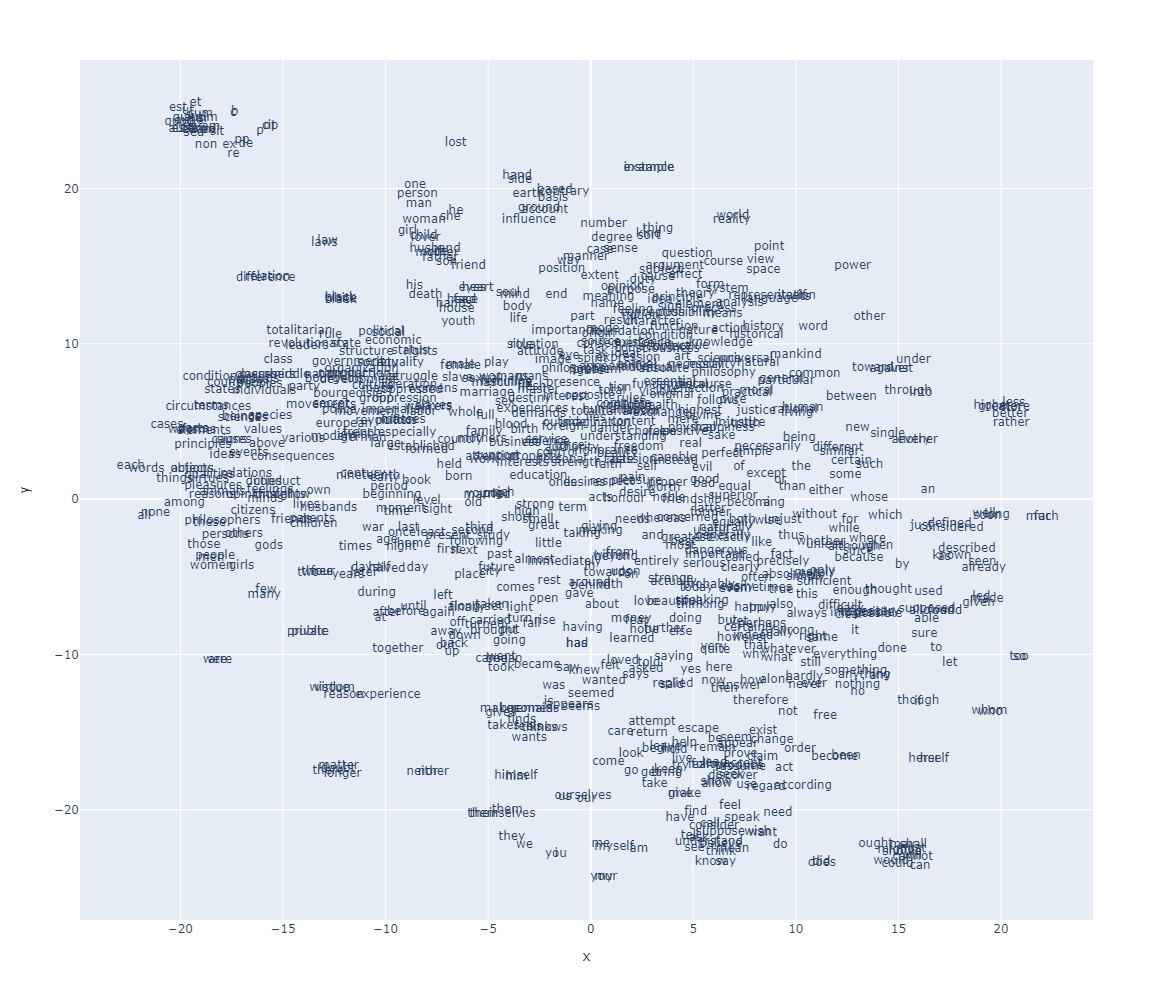

In [19]:
#Plot coordinates 
px.scatter(coords_female, 'x', 'y', text='label', height=1000).update_traces(mode='text')

#### Analysis
....

### t-SNE Plot for MALE Author Texts

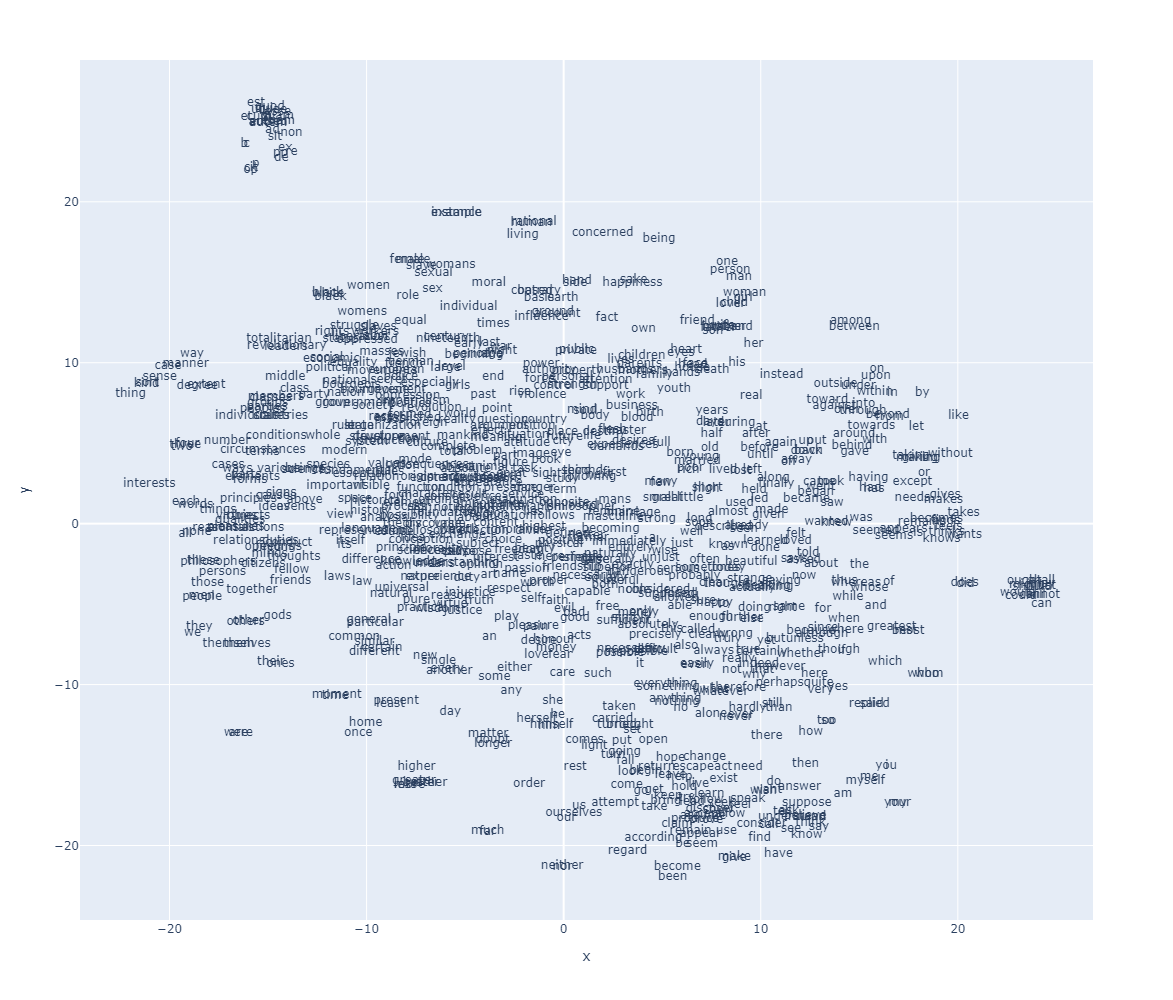

In [20]:
#Plot coordinates 
px.scatter(coords_male, 'x', 'y', text='label', height=1000).update_traces(mode='text')

### Semantic Algebra

In [21]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# Male Texts
def complete_analogy_male(A, B, C, n=2):
    try:
        return model_male.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [22]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# Female texts
def complete_analogy_female(A, B, C, n=2):
    try:
        return model_female.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

#### FEMALE vs MALE Author Texts Semantic Algebra

In [23]:
#FEMALE
complete_analogy_female('lead', 'seek', 'discover')

[('consider', 0.7404757738113403), ('call', 0.7251384854316711)]

In [24]:
#MALE
complete_analogy_male('lead', 'seek', 'discover')

[('consider', 0.7542868256568909), ('feel', 0.7484155893325806)]

In [25]:
#FEMALE
complete_analogy_female('humanity', 'feminine', 'ignorance')

[('beauty', 0.5556420683860779), ('masculine', 0.546761691570282)]

In [26]:
#MALE
complete_analogy_male('humanity', 'feminine', 'ignorance')

[('masculine', 0.53557950258255), ('happy', 0.49471384286880493)]

In [27]:
#FEMALE
complete_analogy_female('pleasures', 'things', 'virtues')

[('words', 0.6356379389762878), ('events', 0.6353102326393127)]

In [28]:
#MALE
complete_analogy_male('pleasures', 'things', 'virtues')

[('principles', 0.655857264995575), ('words', 0.5980985164642334)]

In [29]:
#FEMALE
complete_analogy_female('religion', 'education', 'freedom')

[('free', 0.5268673300743103), ('support', 0.5146975517272949)]

In [30]:
#MALE
complete_analogy_male('religion', 'education', 'freedom')

[('husbands', 0.4773518741130829), ('support', 0.4648189842700958)]

In [31]:
#FEMALE
complete_analogy_female('leaders', 'revolutionary', 'totalitarian')

[('political', 0.5254395604133606), ('european', 0.48804521560668945)]

In [32]:
#MALE
complete_analogy_male('leaders', 'revolutionary', 'totalitarian')

[('modern', 0.5787111520767212), ('police', 0.5651019215583801)]

In [33]:
#FEMALE
complete_analogy_female('play', 'womens', 'masculine')

[('oppression', 0.599484384059906), ('workers', 0.5803115963935852)]

In [34]:
#MALE
complete_analogy_male('play', 'womens', 'masculine')

[('social', 0.5942589044570923), ('female', 0.570629358291626)]

In [35]:
#FEMALE
complete_analogy_female('pure', 'divine', 'mans')

[('womans', 0.5486488938331604), ('master', 0.5085620284080505)]

In [36]:
#MALE
complete_analogy_male('pure', 'divine', 'mans')

[('his', 0.4981544613838196), ('passion', 0.49048757553100586)]

In [37]:
#FEMALE
complete_analogy_female('meaning', 'value', 'understanding')

[('wisdom', 0.6298676133155823), ('less', 0.5880017280578613)]

In [38]:
#MALE
complete_analogy_male('meaning', 'value', 'understanding')

[('wisdom', 0.6637543439865112), ('labour', 0.6453812718391418)]

#### Analysis
...

### Overall Analysis